Projektet är skapat av:
Maximilian Törnqvist,
Mustafa Bay,
Fredrik Hammar,
Grupp 7


#Sentiment Analysis for Twitter
Detta är ett studentprojekt som utvecklats under en AI-kurs på Stockholms Universitet. Projektet ämnar att ge verktyg för att utföra sentiment analysis på texter som hämtas från Twitter med hjälp av Tweepys wrapper-bibliotek för Twitters API. Projektet bygger i stora delar på koden i följande tutorial: https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk.

## 1. Installation & Tokenizing

In [ ]:
#Laddar ned Python, NLTK och ett dataset med tweets
!pip install nltk==3.3
import nltk
nltk.download('twitter_samples')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.corpus import twitter_samples


"""
Dataset består av 5000 tweets med positivt sentiment, 5000 med negativt sentiment samt 20000 tweets med inget sentiment.
Dessa sparas i nedanstående variabler.
"""

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
#Använder default-metod för tokenisering(?) av tweets
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(tweet_tokens[0])

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


## 2. Rengöring och normalisering av data

#### 2.1. Rengöring av data
Denna funktion tar emot en tweet updelad i tokens och loopar sedan igenom samtliga tokens och ersätter ogiltiga tecken med tomma strängar. Därutöver använder den också sig av en lemmatizer(beskrivs nedan) för att omvandla orden till sin grundform. Funktionen returnernar en lista med tokens.

#### 2.2. Normalisering av data
Ord har olika böjningar och i nedanstående kod används lemmatizing för att normalisera dessa böjningar. Syftet med detta är att kunna behandla olika böjningar av ett ord som samma ord.

Detta sker i flertalet steg:
1. Orden får en tagg för deras positionering i meningsuppbyggnaden (t.ex. en tagg för adjektiv, en tagg för verb osv.)
2. Orden får en konverterad tagg som är anpassad så att den ska vara möjlig för WordNetLemmatizern att tolka.
3. Därefter tar lemmatizern emot ordet och dess tillhörande tagg.
4. Lemmatizern returnerar sedan förhoppningsvis orden i sin grundform.

Lista på samtliga POS-taggar:
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

För Lemmatization i Python finns också många andra alternativ:
https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#wordnetlemmatizerwithappropriatepostag

In [ ]:
import re, string
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

#Skriver ut samtliga tokens i den första tweeten efter att "skräpet" tagits bort.
print(remove_noise(tweet_tokens[0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['#followfriday', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


## 3. Rensa samtliga tweets


In [ ]:
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
print(positive_tweet_tokens[0])

#Skapar två listor för att hålla de rengjorda tweetsen

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens))
    

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


## 4. Ordfrekvens

In [ ]:
#OBS! Denna kodcell är inte nödvändig för resten av koden utan fungerar mer som en bonus.
from nltk import FreqDist

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def printFrequentWords(tokens_list):
  all_words = get_all_words(tokens_list)
  print(FreqDist(all_words).most_common(10))


all_pos_words = get_all_words(positive_cleaned_tokens_list)

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[(':)', 3691), ('you', 1463), ('be', 1189), ('to', 1093), ('i', 1093), ('the', 1086), ('a', 934), ('for', 771), ('and', 706), (':-)', 701)]


## 5. Förberedd för lärande


In [ ]:
#Skapar dictionary med token som nyckel och True som värde
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

### 5.2 Skapar träningsset & testset

Varje tweet får en label/etikett beroende på vilken datasamling tweeten tillhör. Dvs. alla positiva tweets får en etikett som säger "Positive" och alla negativa tweets får en etikett som säger "Negative". Därefter läggs alla tweets in i en gemensam datasamling. Tweetsen i denna datasamling sorteras sedan om på slumpmässigt vis och därefter delas datasamling om i två delar för att till ett träningsset och ett testset.

In [ ]:
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

## 6. Bygger modellen, tränar modellen och testar modellen
I nedanstående kod hämtas en modell av typen NaiveBayesClassifier. Denna modell tränas först på den träningsdata som vi förbehandlade i ovanstående kod. Därefter matas modellen med test-datan. Vi skriver sedan ut hur väl modellen presterar(modellens precision). Därtill skriver vi också ut vilka tokens/features som är tydligast förknippade med olika sentiment.

Diskussion & andra möjligheter:
Här skulle vi antagligen kunna pröva flertalet olika classifiers för att se vilken som funkar bäst(Diskussion om andra möjliga modeller: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4).

In [ ]:
from nltk import classify
from nltk import NaiveBayesClassifier


classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.994
Most Informative Features
                      :( = True           Negati : Positi =   2079.1 : 1.0
                      :) = True           Positi : Negati =    993.4 : 1.0
                follower = True           Positi : Negati =     31.9 : 1.0
                     sad = True           Negati : Positi =     31.8 : 1.0
                    glad = True           Positi : Negati =     20.7 : 1.0
              appreciate = True           Positi : Negati =     16.1 : 1.0
                    blog = True           Positi : Negati =     13.5 : 1.0
                     idk = True           Negati : Positi =     12.5 : 1.0
                    sick = True           Negati : Positi =     12.3 : 1.0
                  arrive = True           Positi : Negati =     12.0 : 1.0
None


## 7. Funktion för grafisk presentation av analysen
Denna funktion skriver för tillfället hela tiden ut nya grafer. En tanke är att den senare istället ska kunna uppdatera graferna (eventuellt med hjälp av matplotlib.animation: https://matplotlib.org/3.2.1/api/animation_api.html).

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def print_graph(new_positive_tweets, new_negative_tweets, title):
  #Hämtar data och anpassar den till cirkeldiagramsformatet
  pos_length = len(new_positive_tweets)
  neg_length = len(new_negative_tweets)
  total_tweets = pos_length + neg_length
  pos_percent = (pos_length / total_tweets) * 10
  neg_percent = (neg_length / total_tweets) * 10
  #Anger diagrammets egenskaper och skriver sedan ut diagrammet
  sizes = [pos_percent, neg_percent]
  plt.style.use('classic')
  labels = 'Positive', 'Negative'
  fig, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')
  ax1.set_title(title)
  plt.show()

## 8. Testar på egen data
Denna kodcell använder sig av trådar för att kunna lyssna av flertalet söktermer samtidigt. Detta sker med hjälp av Twitters sök-API(se länk nedan) och tweepy(se länk nedan) som är någon form utav wrapper-biblitok för att kommunicera med APIn i Pythonskrift. Genom att skaffa ett developer-konto och registrera en applikation ges accessen till APIn(via åtkomstnycklarna). Dessa nya tweets använder precis som de tidigare remove_noise-funktionen för att "rengöra" datan i tweetsen. Därefter används klassificerar-modellen som sedan tidigare är skapad och tränad under punkt 7. Denna klassificerar sedan sentimentet som sedan presenteraras med hjälp av cirkeldiagram.

Länk till dokumentationen för Twitters sök-API:
https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets

Länk till dokumentationen för Tweepy:
http://docs.tweepy.org/en/latest/getting_started.html


Starting
Starting


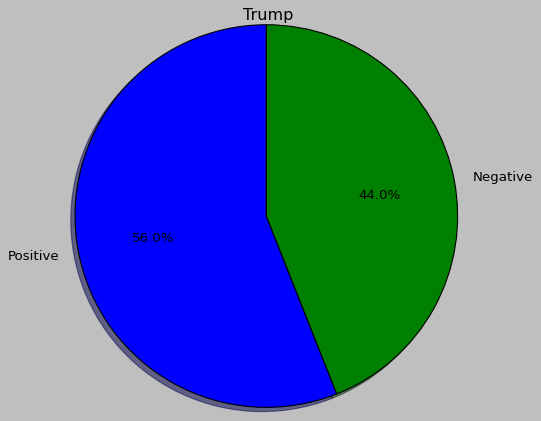

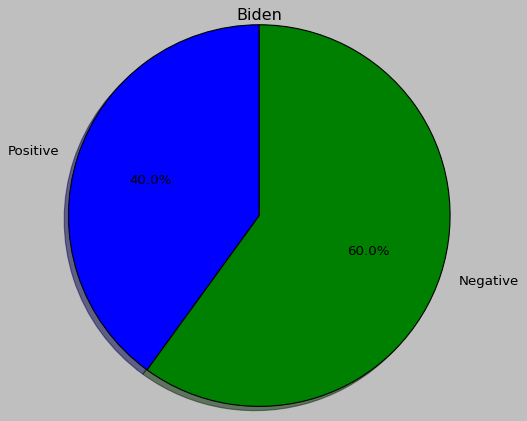

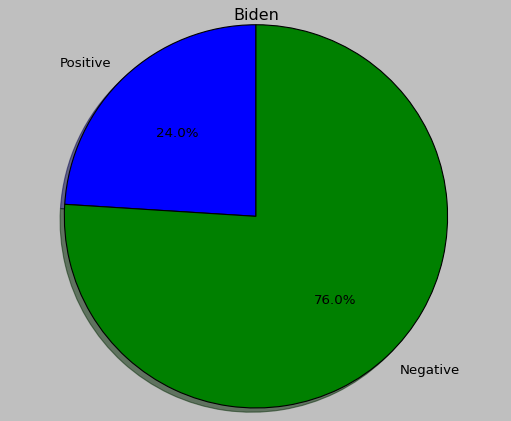

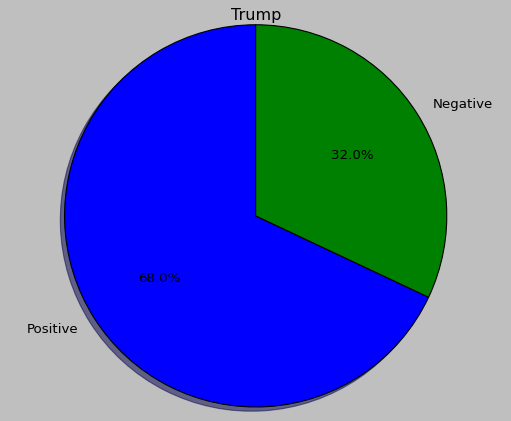

In [ ]:
!pip install tweepy
from nltk.tokenize import word_tokenize
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy import StreamListener

import logging
import threading
import time

#Anger nycklar och liknande för att få åtkomst till APIn
consumer_key = "8PkuM2olR51fxLbNHh65KDUy1"
consumer_secret = "zHitAa0aoFva6Og4LQLIFTHROw8cdcZhGyJD9a9YmHzAMkXTLY"

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)


#Funktion som tar emot en sökterm och printar ut ett cirkeldiagram på sentimentet
def loop_function(searchterm):
  #Skapar tomma listor för att spara tweets beroende på sentiment
  new_positive_tweets = []
  new_negative_tweets = []

  #Skapar oändlig loop för att läsa av twitterflödet
  while True:
    api = tweepy.API(auth)

    #Hämtar 50 nypublicerade tweets och går igenom dem en och en
    for tweet in tweepy.Cursor(api.search, q=searchterm.lower(), result_type='recent').items(50):

      #Använder tidigare metod för att rengöra tweeten
      custom_tokens = remove_noise(word_tokenize(tweet.text))

      #Använder modellen för att klassificiera sentiment och lägger sedan till tweeten i lista beroende på sentimentet
      sentiment = (classifier.classify(dict([token, True] for token in custom_tokens)))
      if(sentiment == "Negative"):
        new_negative_tweets.append(sentiment)
      else:
        new_positive_tweets.append(sentiment)

    #Skriver ut diagrammet och rensar därefter listorna med tweets, därefter väntar loopen i 60 sek och börjar sedan om
    print_graph(new_positive_tweets, new_negative_tweets, searchterm)
    new_positive_tweets.clear()
    new_negative_tweets.clear()
    time.sleep(60)

#Trådklass som tar emot en sökterm och kör sedan loop_function
class myThread (threading.Thread):
   def __init__(self, searchterm):
      threading.Thread.__init__(self)
      self.searchterm = searchterm
   def run(self):
      print("Starting")
      loop_function(self.searchterm)

#Skapar instanser av myThread-klassen
thread1 = myThread("Trump")
thread2 = myThread("Biden")

#Startar trådar
thread1.start()
thread2.start()

#Väntar på att trådarna exekveras
thread1.join()
thread2.join()
#loop_function("trump")
#loop_function("biden")